## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition

In [2]:
path = "/Users/ideepak/Desktop/Placement/Project/MagicBricks.csv"
dataset = pd.read_csv(path)
dataset.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
dataset = dataset.drop(['Locality'], axis=1)

## Data Understanding

In [4]:
dataset.shape

(1259, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Parking      1226 non-null   float64
 5   Price        1259 non-null   int64  
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1254 non-null   object 
 9   Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 98.5+ KB


In [6]:
dataset.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [7]:
dataset.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [8]:
dataset.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [9]:
numericalCol = dataset.select_dtypes(['float64', 'int64'])
numericalCol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1259 non-null   float64
 1   BHK       1259 non-null   int64  
 2   Bathroom  1257 non-null   float64
 3   Parking   1226 non-null   float64
 4   Price     1259 non-null   int64  
 5   Per_Sqft  1018 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 59.1 KB


In [10]:
categoricalCol = dataset.select_dtypes(['object'])
categoricalCol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Furnishing   1254 non-null   object
 1   Status       1259 non-null   object
 2   Transaction  1259 non-null   object
 3   Type         1254 non-null   object
dtypes: object(4)
memory usage: 39.5+ KB


## Data Visualization

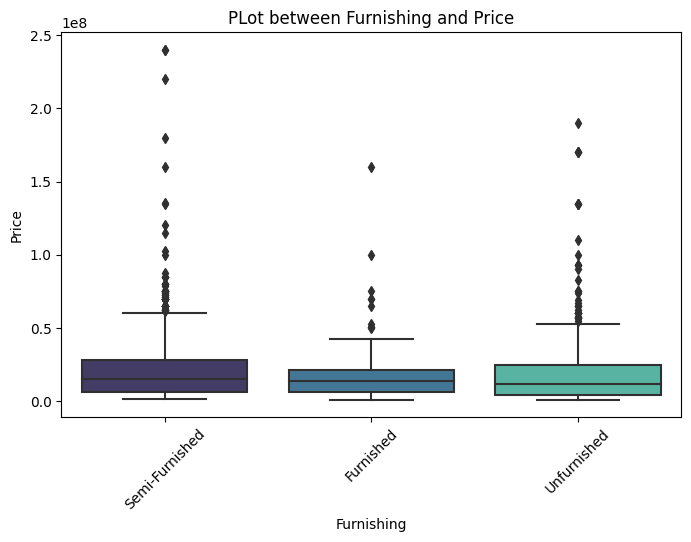

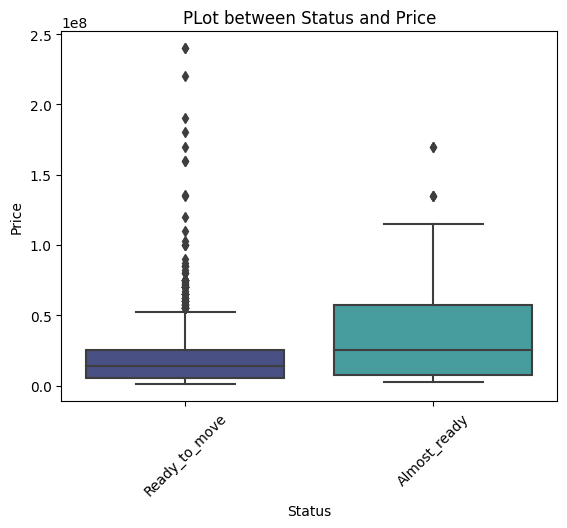

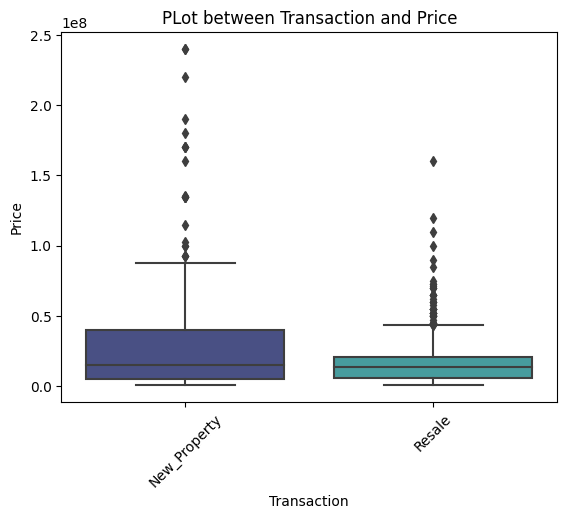

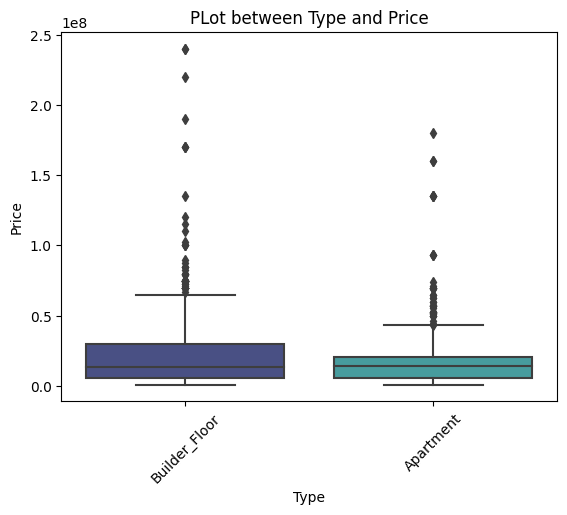

In [11]:
plt.figure(figsize=(8, 5))
for col in categoricalCol.columns:
    sns.boxplot(x=dataset[col], y=dataset['Price'], palette='mako')
    plt.title(f"PLot between {col} and Price")
    plt.xlabel(f"{col}")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

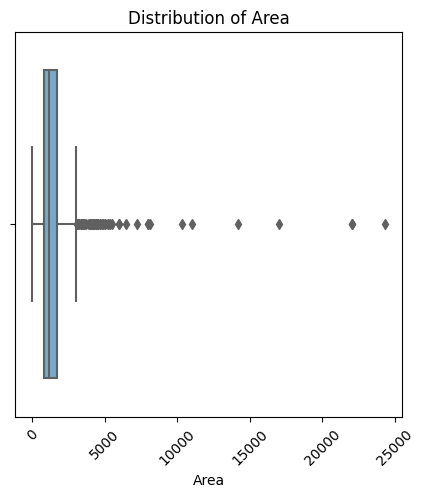

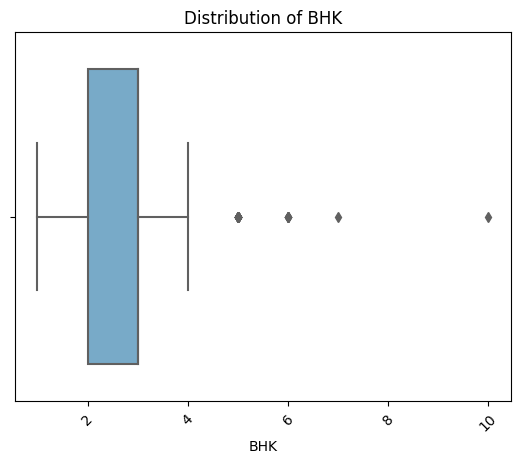

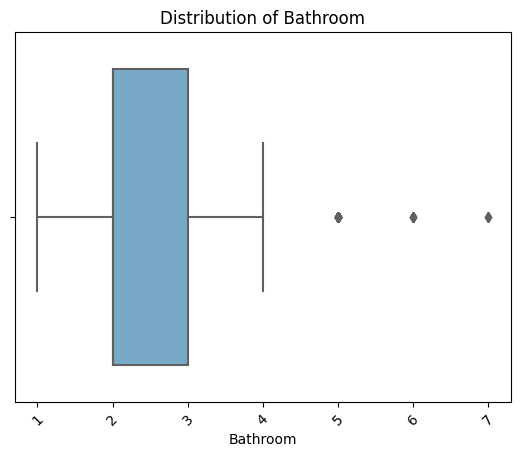

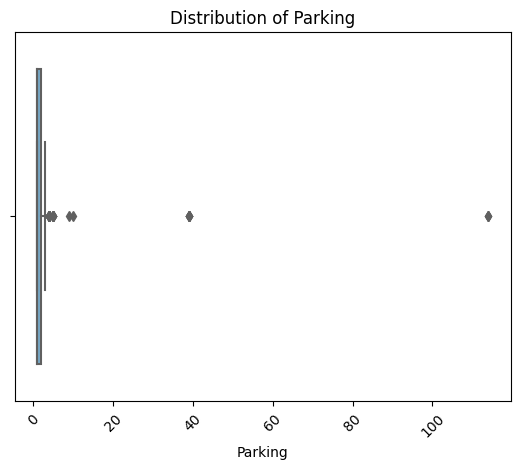

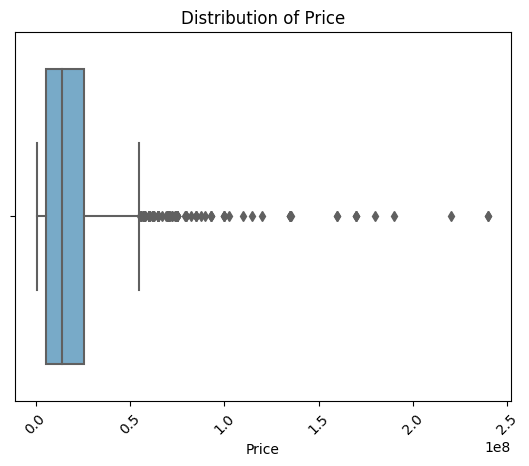

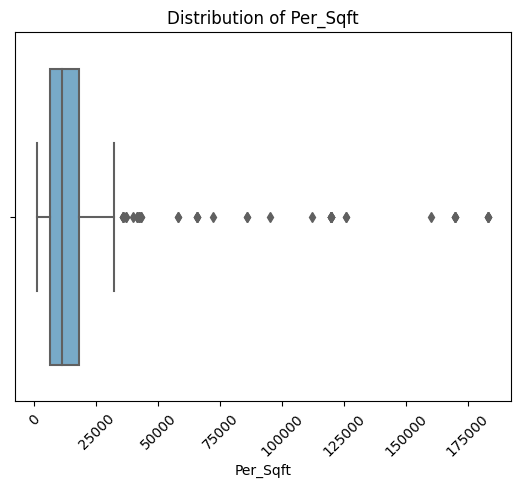

In [12]:
plt.figure(figsize=(5, 5))
for col in numericalCol.columns:
    sns.boxplot(x = dataset[col], palette='Blues')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

## Preprocessing 

In [13]:
dataset.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [14]:
dataset['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [15]:
dataset['Furnishing'].fillna(dataset['Furnishing'].mode()[0], inplace = True)

In [16]:
dataset['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [17]:
dataset['Type'].unique()

array(['Builder_Floor', 'Apartment', nan], dtype=object)

In [18]:
dataset['Type'].fillna(dataset['Type'].mode()[0], inplace = True)

In [19]:
dataset['Type'].unique()

array(['Builder_Floor', 'Apartment'], dtype=object)

In [20]:
dataset.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       0
Parking         33
Price            0
Status           0
Transaction      0
Type             0
Per_Sqft       241
dtype: int64

In [21]:
def numerical_missing_data(dataset):
    
    numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
    dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].median())
    
    return dataset

numerical_missing_data(dataset)

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,11291.5
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [22]:
dataset.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [23]:
categoricalCol

,Furnishing,Status,Transaction,Type
0,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor
1,Semi-Furnished,Ready_to_move,New_Property,Apartment
2,Furnished,Ready_to_move,Resale,Apartment
3,Semi-Furnished,Ready_to_move,Resale,Builder_Floor
4,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...
1254,Unfurnished,Ready_to_move,New_Property,Builder_Floor
1255,Semi-Furnished,Ready_to_move,Resale,Builder_Floor
1256,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor
1257,Unfurnished,Ready_to_move,Resale,Builder_Floor


In [24]:
dataset['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [25]:
dataset['Status'].unique()

array(['Ready_to_move', 'Almost_ready'], dtype=object)

In [26]:
dataset['Transaction'].unique()

array(['New_Property', 'Resale'], dtype=object)

In [27]:
dataset['Type'].unique()

array(['Builder_Floor', 'Apartment'], dtype=object)

In [28]:
fur = [['Unfurnished', 'Semi-Furnished', 'Furnished']]
stat = [['Ready_to_move', 'Almost_ready']]
trans = [['New_Property', 'Resale']]
Type = [['Builder_Floor', 'Apartment']]

In [29]:
from sklearn.preprocessing import OrdinalEncoder

fur_encode = OrdinalEncoder(categories=fur)
dataset['Furnishing'] = fur_encode.fit_transform(dataset[['Furnishing']])

stat_encode = OrdinalEncoder(categories=stat)
dataset['Status'] = stat_encode.fit_transform(dataset[['Status']])

trans_encode = OrdinalEncoder(categories=trans)
dataset['Transaction'] = trans_encode.fit_transform(dataset[['Transaction']])

Type_encode = OrdinalEncoder(categories=Type)
dataset['Type'] = Type_encode.fit_transform(dataset[['Type']])

In [30]:
dataset.head(10)

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1.0,1.0,6500000,0.0,0.0,0.0,11291.5
1,750.0,2,2.0,1.0,1.0,5000000,0.0,0.0,1.0,6667.0
2,950.0,2,2.0,2.0,1.0,15500000,0.0,1.0,1.0,6667.0
3,600.0,2,2.0,1.0,1.0,4200000,0.0,1.0,0.0,6667.0
4,650.0,2,2.0,1.0,1.0,6200000,0.0,0.0,0.0,6667.0
5,1300.0,4,3.0,1.0,1.0,15500000,0.0,0.0,0.0,6667.0
6,1350.0,4,3.0,1.0,1.0,10000000,0.0,1.0,0.0,6667.0
7,650.0,2,2.0,1.0,1.0,4000000,0.0,0.0,1.0,6154.0
8,985.0,3,3.0,0.0,1.0,6800000,1.0,0.0,0.0,6154.0
9,1300.0,4,4.0,1.0,1.0,15000000,0.0,0.0,0.0,6154.0


# Removing outlier

In [31]:
dataset.shape

(1259, 10)

In [32]:
numericalCol

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
0,800.0,3,2.0,1.0,6500000,NaN
1,750.0,2,2.0,1.0,5000000,6667.0
2,950.0,2,2.0,1.0,15500000,6667.0
3,600.0,2,2.0,1.0,4200000,6667.0
4,650.0,2,2.0,1.0,6200000,6667.0
...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,12916.0
1255,1050.0,3,2.0,3.0,12500000,12916.0
1256,875.0,3,3.0,3.0,17500000,12916.0
1257,990.0,2,2.0,1.0,11500000,12916.0


In [33]:
categoricalCol

,Furnishing,Status,Transaction,Type
0,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor
1,Semi-Furnished,Ready_to_move,New_Property,Apartment
2,Furnished,Ready_to_move,Resale,Apartment
3,Semi-Furnished,Ready_to_move,Resale,Builder_Floor
4,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...
1254,Unfurnished,Ready_to_move,New_Property,Builder_Floor
1255,Semi-Furnished,Ready_to_move,Resale,Builder_Floor
1256,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor
1257,Unfurnished,Ready_to_move,Resale,Builder_Floor


In [34]:
def remove_outliers(dataset, numericalCol, categoricalCol):
    for col in numericalCol + categoricalCol:
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]
    return dataset

In [35]:
dataset = remove_outliers(dataset, numericalCol, categoricalCol)
dataset

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1.0,1.0,6500000,0.0,0.0,0.0,11291.5
1,750.0,2,2.0,1.0,1.0,5000000,0.0,0.0,1.0,6667.0
2,950.0,2,2.0,2.0,1.0,15500000,0.0,1.0,1.0,6667.0
3,600.0,2,2.0,1.0,1.0,4200000,0.0,1.0,0.0,6667.0
4,650.0,2,2.0,1.0,1.0,6200000,0.0,0.0,0.0,6667.0
...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,1.0,1.0,26000000,0.0,1.0,0.0,12916.0
1253,1200.0,3,3.0,1.0,1.0,16500000,0.0,1.0,0.0,12916.0
1255,1050.0,3,2.0,1.0,3.0,12500000,0.0,1.0,0.0,12916.0
1256,875.0,3,3.0,1.0,3.0,17500000,0.0,0.0,0.0,12916.0


In [36]:
dataset.shape

(964, 10)

In [37]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Price'], axis=1)
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(964, 9) (771, 9) (193, 9)


In [39]:
X

,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1.0,1.0,0.0,0.0,0.0,11291.5
1,750.0,2,2.0,1.0,1.0,0.0,0.0,1.0,6667.0
2,950.0,2,2.0,2.0,1.0,0.0,1.0,1.0,6667.0
3,600.0,2,2.0,1.0,1.0,0.0,1.0,0.0,6667.0
4,650.0,2,2.0,1.0,1.0,0.0,0.0,0.0,6667.0
...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,1.0,1.0,0.0,1.0,0.0,12916.0
1253,1200.0,3,3.0,1.0,1.0,0.0,1.0,0.0,12916.0
1255,1050.0,3,2.0,1.0,3.0,0.0,1.0,0.0,12916.0
1256,875.0,3,3.0,1.0,3.0,0.0,0.0,0.0,12916.0


In [40]:
y

0        6500000
1        5000000
2       15500000
3        4200000
4        6200000
          ...   
1252    26000000
1253    16500000
1255    12500000
1256    17500000
1257    11500000
Name: Price, Length: 964, dtype: int64

## Model Building

In [41]:
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    ElasticNet,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression (SVR)": SVR(),
    "K-Nearest Neighbors Regression (KNN)": KNeighborsRegressor(),
    "XGBoost Regression": xgb.XGBRegressor()
}

best_model = None
best_r2 = -float('inf')

for name, classifier in models.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{classifier.__class__.__name__} :-- R-squared (R2): {r2*100:.2f}")
    
    if r2 > best_r2:
        best_model = classifier
        best_r2 = r2
        
    print("\n")

print("=" *70, "\n")
print(f"Best model is  {best_model.__class__.__name__} with r2_score of {best_r2*100:.2f}", "\n")
print("=" *70, "\n")

LinearRegression :-- R-squared (R2): 74.62


Lasso :-- R-squared (R2): 74.62


Ridge :-- R-squared (R2): 74.62


ElasticNet :-- R-squared (R2): 72.76


DecisionTreeRegressor :-- R-squared (R2): 67.51


RandomForestRegressor :-- R-squared (R2): 81.44


GradientBoostingRegressor :-- R-squared (R2): 80.02


SVR :-- R-squared (R2): -11.20


KNeighborsRegressor :-- R-squared (R2): 75.44


XGBRegressor :-- R-squared (R2): 77.71



Best model is  RandomForestRegressor with r2_score of 81.44 




## Predicting 

In [43]:
Area = float(input(f"Enter value for Area [in sq feet]:-> "))
BHK = float(input(f"Enter value for BHK :-> "))
Bathroom = float(input(f"Enter value for Bathroom :-> "))
Furnishing = float(input(f"Enter value for Furnishing [0 : Unfurnished, 1 : Semi-Furnished, 2 : Furnished] :-> "))
Parking = float(input(f"Enter value for Parking :-> "))
Status = float(input(f"Enter value for Status [0 : Ready_to_move, 1 : Almost_ready]:-> "))
Transaction = float(input(f"Enter value for Transaction [0 : New_Property, 1 : Resale]:-> "))
Type = float(input(f"Enter value for Type [0 : Builder_Floor, 1 : Apartment]:-> "))
Per_Sqft = float(input(f"Enter value for Per_Sqft :-> "))

X_data = [Area, BHK, Bathroom, Furnishing, Parking, Status, Transaction, Type, Per_Sqft]

# Convert user input to numpy array and reshape
user_input_array = np.asarray(X_data).reshape(1, -1)

predicted_price = best_model.predict(user_input_array)[0]

print('\n')

print(f"Predicted price is: {predicted_price:.2f}")

# 650.0	2	2.0	1.0	1.0	0.0	0.0	0.0	6667.0

Enter value for Area [in sq feet]:-> 650
Enter value for BHK :-> 2
Enter value for Bathroom :-> 2
Enter value for Furnishing [0 : Unfurnished, 1 : Semi-Furnished, 2 : Furnished] :-> 1
Enter value for Parking :-> 1
Enter value for Status [0 : Ready_to_move, 1 : Almost_ready]:-> 0
Enter value for Transaction [0 : New_Property, 1 : Resale]:-> 0
Enter value for Type [0 : Builder_Floor, 1 : Apartment]:-> 0
Enter value for Per_Sqft :-> 6667


Predicted price is: 5643000.00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
